see https://duckdb.org/docs/guides/python/jupyter.html

In [3]:
import duckdb
import pandas as pd

%load_ext sql
conn = duckdb.connect()
%sql conn --alias duckdb

In [4]:
%sql SELECT 'Off and flying!' AS a_duckdb_column;

Running query in 'duckdb'

a_duckdb_column
Off and flying!


In [5]:
%%sql
SELECT schema_name, function_name
FROM duckdb_functions()
ORDER BY ALL DESC
LIMIT 5;

Running query in 'duckdb'

schema_name,function_name
pg_catalog,shobj_description
pg_catalog,shobj_description
pg_catalog,shobj_description
pg_catalog,pg_typeof
pg_catalog,pg_typeof


In [5]:
%%sql
INSTALL httpfs;
LOAD httpfs;

,Success


In [6]:
%%sql --save short_trips --no-execute
SELECT *
FROM 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2021-01.parquet'
WHERE trip_distance < 6.3

Running query in 'duckdb'

Skipping execution...

<Axes: title={'center': "'trip_distance' from 'short_trips'"}, xlabel='trip_distance', ylabel='Count'>

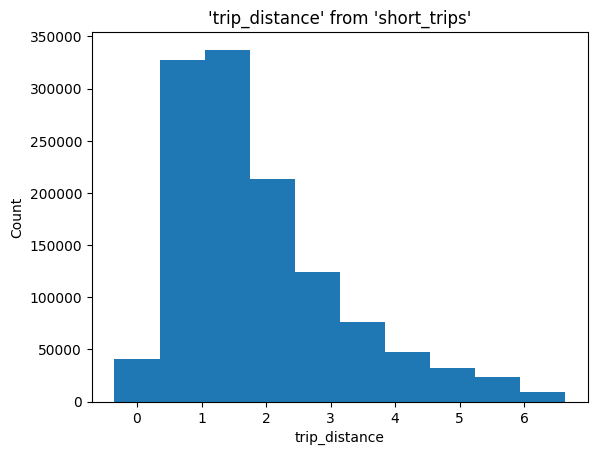

In [7]:
%sqlplot histogram --table short_trips --column trip_distance --bins 10 --with short_trips

In [10]:
%%sql --save short_trips2 --no-execute
SELECT *
FROM '../../data/tripdata.parquet'
WHERE trip_distance < 6.3

Running query in 'duckdb'

Skipping execution...

<Axes: title={'center': "'trip_distance' from 'short_trips2'"}, xlabel='trip_distance', ylabel='Count'>

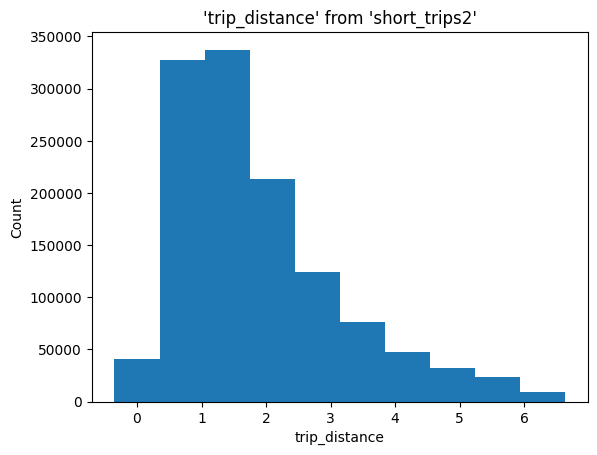

In [11]:
%sqlplot histogram --table short_trips2 --column trip_distance --bins 10 --with short_trips2